In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('tennis_stats.csv')

### Service Game Columns (Offensive)
**Aces**: number of serves by the player where the receiver does not touch the ball<br>
**DoubleFaults**: number of times player missed both first and second serve attempts<br>
**FirstServe**: % of first-serve attempts made<br>
**FirstServePointsWon**: % of first-serve attempt points won by the player<br>
**SecondServePointsWon**: % of second-serve attempt points won by the player<br>
**BreakPointsFaced**: number of times where the receiver could have won service game of the player<br>
**BreakPointsSaved**: % of the time the player was able to stop the receiver from winning service game when they had the chance<br>
**ServiceGamesPlayed**: total number of games where the player served<br>
**ServiceGamesWon**: total number of games where the player served and won<br>
**TotalServicePointsWon**: % of points in games where the player served that they won<br>
### Return Game Columns (Defensive)
**FirstServeReturnPointsWon**: % of opponents first-serve points the player was able to win<br>
**SecondServeReturnPointsWon**: % of opponents second-serve points the player was able to win<br>
**BreakPointsOpportunities**: number of times where the player could have won the service game of the opponent<br>
**BreakPointsConverted**: % of the time the player was able to win their opponent’s service game when they had the chance<br>
**ReturnGamesPlayed**: total number of games where the player’s opponent served<br>
**ReturnGamesWon**: total number of games where the player’s opponent served and the player won<br>
**ReturnPointsWon**: total number of points where the player’s opponent served and the player won<br>
**TotalPointsWon**: % of points won by the player<br>
### Outcomes
**Wins**: number of matches won in a year<br>
**Losses**: number of matches lost in a year<br>
**Winnings**: total winnings in USD($) in a year<br>
**Ranking**: ranking at the end of year

In [3]:
offensive = ['Aces',
             'DoubleFaults',
             'FirstServe',
             'FirstServePointsWon',
             'SecondServePointsWon',
             'BreakPointsFaced',
             'BreakPointsSaved',
             'ServiceGamesPlayed',
             'ServiceGamesWon',
             'TotalServicePointsWon']
defensive = ['FirstServeReturnPointsWon',
             'SecondServeReturnPointsWon',
             'BreakPointsOpportunities',
             'BreakPointsConverted',
             'ReturnGamesPlayed',
             'ReturnGamesWon',
             'ReturnPointsWon',
             'TotalPointsWon']
features = offensive + defensive
outcomes = ['Wins',
            'Losses',
            'Winnings',
            'Ranking']

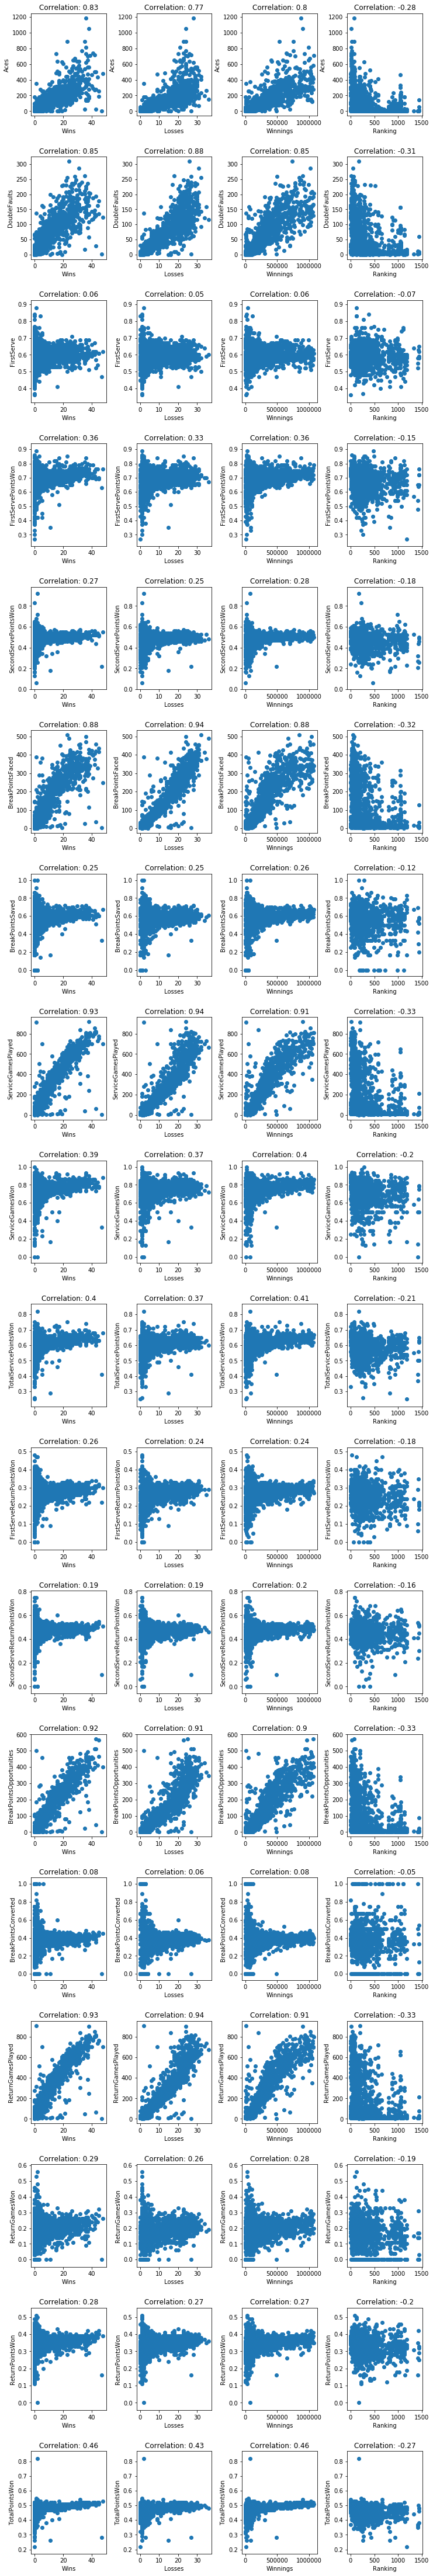

In [4]:
plt.figure(figsize=(12, 80))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
for i in range(len(features)):
    for j in range(len(outcomes)):
        plt.subplot(len(features), len(outcomes), 1+i*len(outcomes)+j)
        plt.scatter(df[outcomes[j]], df[features[i]])
        plt.xlabel(outcomes[j])
        plt.ylabel(features[i])
        plt.title(f'Correlation: {round(df[features[i]].corr(df[outcomes[j]]), 2)}')
plt.show()

In [5]:
def linear_regression(features, outcome):
    X = df[features]
    y = df[outcome]
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,
                                                        test_size=0.2, random_state=1)
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    print(f'Outcome: {outcome}')
    print(f'Train Score: {reg.score(X_train, y_train)}')
    print(f'Test Score: {reg.score(X_test, y_test)}')
    coef = sorted(list(zip(features, reg.coef_)), key = lambda x: abs(x[1]), reverse=True)
    print('\tFeature coefficients:')
    for i in range(len(coef)):
        print(f'{coef[i][0]}: {coef[i][1]}')
    y_predicted = reg.predict(X_test)
    plt.figure(figsize=(5, 5))
    plt.scatter(y_test, y_predicted)
    plt.xlabel(f'{outcome}')
    plt.ylabel(f'Predicted {outcome}')
    plt.show()

# Linear regression: one feature

Outcome: Winnings
Train Score: 0.840897433034283
Test Score: 0.8040898313870518
	Feature coefficients:
ServiceGamesPlayed: 1051.1907064949341


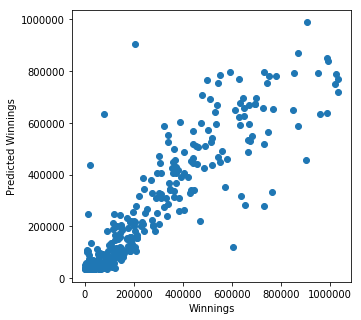

In [6]:
linear_regression(['ServiceGamesPlayed'], 'Winnings')

Outcome: Winnings
Train Score: 0.8186603337174662
Test Score: 0.7790768695631647
	Feature coefficients:
BreakPointsOpportunities: 1850.1168168699667


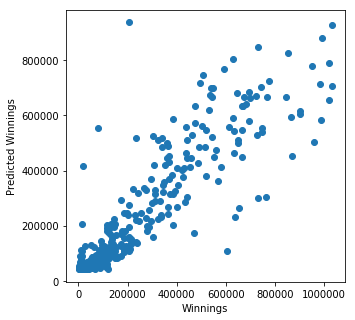

In [7]:
linear_regression(['BreakPointsOpportunities'], 'Winnings')

# Linear regression: two features

Outcome: Winnings
Train Score: 0.8409323982716942
Test Score: 0.8045167882641538
	Feature coefficients:
ServiceGamesPlayed: 1432.529321380959
ReturnGamesPlayed: -381.1519608729075


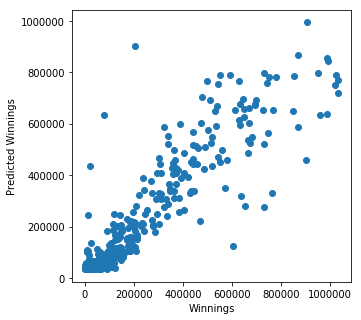

In [8]:
linear_regression(['ServiceGamesPlayed', 'ReturnGamesPlayed'], 'Winnings')

Outcome: Winnings
Train Score: 0.8420795582338332
Test Score: 0.8055953112285724
	Feature coefficients:
ServiceGamesPlayed: 861.6566975879782
BreakPointsOpportunities: 345.316259597748


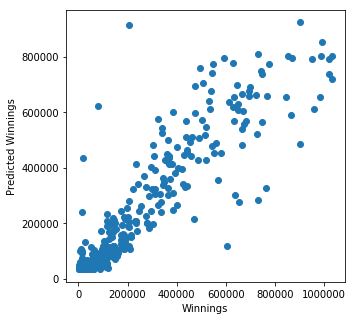

In [9]:
linear_regression(['ServiceGamesPlayed', 'BreakPointsOpportunities'], 'Winnings')

# Linear regression: multiple features

Outcome: Winnings
Train Score: 0.8484449500729737
Test Score: 0.8149220333672944
	Feature coefficients:
TotalServicePointsWon: -278867.33969898376
FirstServePointsWon: 204290.30057714635
TotalPointsWon: -173585.69800231647
SecondServePointsWon: 147073.2639542187
ReturnGamesWon: 82295.98252337825
FirstServeReturnPointsWon: -75425.80410395574
FirstServe: 46152.65740566601
BreakPointsSaved: 43302.73151952661
SecondServeReturnPointsWon: 8338.067657412463
BreakPointsConverted: -3544.3859008735453
ServiceGamesWon: -3342.776815712379
BreakPointsFaced: -831.8106407526159
ServiceGamesPlayed: 730.3576738763286
BreakPointsOpportunities: 639.957560096198
DoubleFaults: 602.1601754878325
ReturnGamesPlayed: 297.4610634097917
ReturnPointsWon: 239.20278974904068
Aces: -70.68244394569086


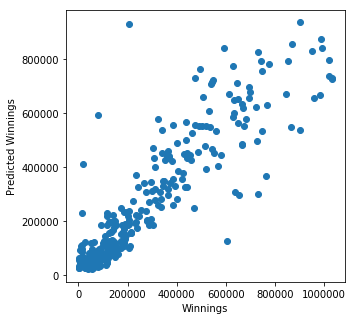

In [10]:
linear_regression(features, 'Winnings')

Outcome: Winnings
Train Score: 0.8455321854253499
Test Score: 0.8096099680121255
	Feature coefficients:
TotalServicePointsWon: -282319.1539466572
FirstServePointsWon: 161502.39007060457
SecondServePointsWon: 118428.74725687206
BreakPointsSaved: 36205.98562938231
ServiceGamesWon: -18541.59156474715
FirstServe: 16395.06691913505
ServiceGamesPlayed: 1438.1765047036129
BreakPointsFaced: -813.2236232176782
DoubleFaults: 626.919442340489
Aces: -206.2297930787062


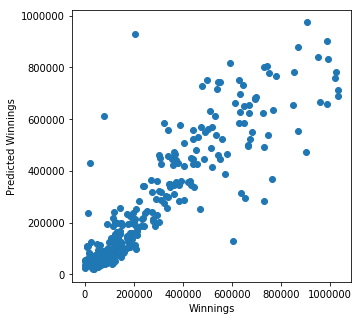

In [11]:
linear_regression(offensive, 'Winnings')

Outcome: Winnings
Train Score: 0.8419755717111046
Test Score: 0.8050842850412694
	Feature coefficients:
TotalPointsWon: 112665.40843481189
ReturnPointsWon: -91273.05809631797
FirstServeReturnPointsWon: -82585.19889332214
ReturnGamesWon: 57038.816376475355
SecondServeReturnPointsWon: 11620.573581630277
BreakPointsConverted: -9421.067857955837
ReturnGamesPlayed: 842.1944998008839
BreakPointsOpportunities: 371.8095115608212


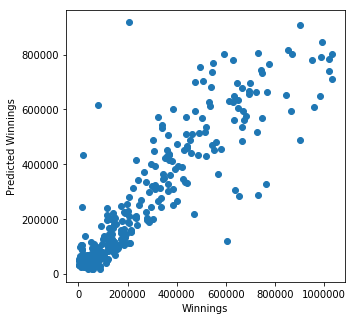

In [12]:
linear_regression(defensive, 'Winnings')